# Examen

Ana Teresa Calderón Juárez 187550

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$

$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$



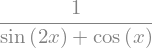

In [116]:
#importo lo que voy a necesitar
import numpy as np

from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import Symbol
import sympy as sym
#declaro funciones y variables
x = Symbol('x')
y = sym.Function('y')(x)
z = sym.Function('z')(x)
w = sym.Function('w')(x)

y=sym.sin(x)
z=sym.cos(x)
w=1/(sym.cos(x)+sym.sin(2*x))
w

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$





In [38]:
#Declaro g(x)
g = sym.Function('g')(x)
g=y*z
#Devirar g en términos de x
sym.diff(g,x)

(c) Grafica $w(x)$ en el rango $[0,1]$

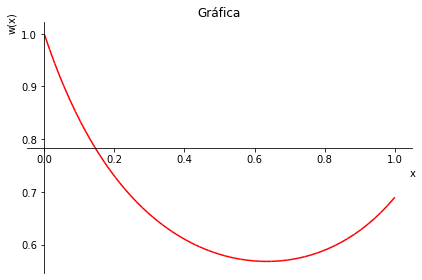

In [97]:
#Gráfica pd. no encontré como hacerla mas bonita como sympy
sym.plot(w,(x,0,1),line_color="red",title='Gráfica',xlabel='x',ylabel='w(x)',sharex = True)

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.



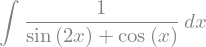

In [102]:
#Integrar pero no la resuelve, así que me la voy a saltar
sym.integrate(w,x)

In [48]:
#Definida
#La volvi a definar para evaluarla
integ = sym.Integral(w, (x, 0, 1))
integ.evalf()

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?



In [49]:
#Calcular los limites
sym.limit(y, x, 0)

In [50]:
sym.limit(z, x, 0)

In [51]:
sym.limit(g, x, 0)

In [52]:
sym.limit(w, x, 0)

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor

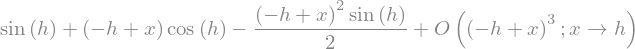

In [69]:
h=Symbol('h')
#Alrededor de h
y.series(x, x0=h, n=3)

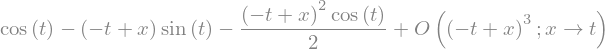

In [61]:
t=Symbol('t')
#Alrededor de t
sym.series(z, x, t,3)

<div class="alert alert-info">
**NOTA** Muestra las expresiones en cada inciso.
</div>

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

In [84]:
import scipy as sp
import matplotlib.pyplot as plt

In [110]:
#Modifiqué la clase Pendulo :)
class Atractor:
    
    def __init__(self, x0, y0, z0, a, b, c):
        self.x = x0
        self.y = y0
        self.z = z0
        self.a = a
        self.b = b
        self.c = c

    def X(self):
        return self.trajectory[:,0]
    
    def Y(self):
        return self.trajectory[:,1]
    
    def Z(self):
        return self.trajectory[:,2]
    
    def plot(self):
        fig, ax = plt.subplots(3,1, figsize=(10,8), sharex = True)

        ax[0].plot(self.tau, self.X(), label="x", color="blue")
        ax[1].plot(self.tau, self.Y(), label="y", color="green")
        ax[2].plot(self.tau, self.Z(),  marker='o', linestyle='None', color='red', label="z")

        ax[0].set_ylabel("X")
        ax[0].set_xlabel("tiempo (s)")

        ax[1].set_ylabel("Y")
        ax[1].set_xlabel("tiempo (s)")

        ax[2].set_ylabel("Z")
        ax[2].set_xlabel("tiempo (s)")
        
#PAra graficar 3d
    def plot3(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ax.plot(xs=self.trajectory[:,0], ys=self.trajectory[:,1], zs=self.trajectory[:,2], label="Atractor", color="blue")
    
    def initial_conditions(self, x0, y0, z0):
        self.x = x0
        self.y = y0
        self.z = z0
        
    def dynamics(self, state, t):
        x = state[0]
        y = state[1]
        z = state[2]
        g0 = - y - z
        g1 = x + self.a * y
        g2 = self.b + z * (x - self.c)
        return np.array([g0, g1, g2])
        
    def integrate(self, num_steps, t_i, t_f, method):
        self.tau, self.dt = np.linspace(t_i, t_f, num=num_steps, retstep=True)
        self.trajectory = np.zeros([num_steps, 3])
        self.trajectory[0,0] = self.x
        self.trajectory[0,1] = self.y
        self.trajectory[0,2] = self.z
        
        for j in range(N-1):
            self.trajectory[j+1] = method(self.trajectory[j], self.tau[j], self.dt, self.dynamics)



In [111]:
def RK(y, t, dt, derivadas):
    k0 = dt * derivadas(y, t)
    k1 = dt * derivadas(y + k0, t + dt)
    y_next = y + 0.5 * (k0 + k1)
    return y_next

In [112]:
atrac = Atractor(x0 = 0, y0 = 0, z0 = 0, a = 0.13, b = 0.2, c = 6.5)  
N = 1000
tiempo_inicial = 0.0
tiempo_final = 100


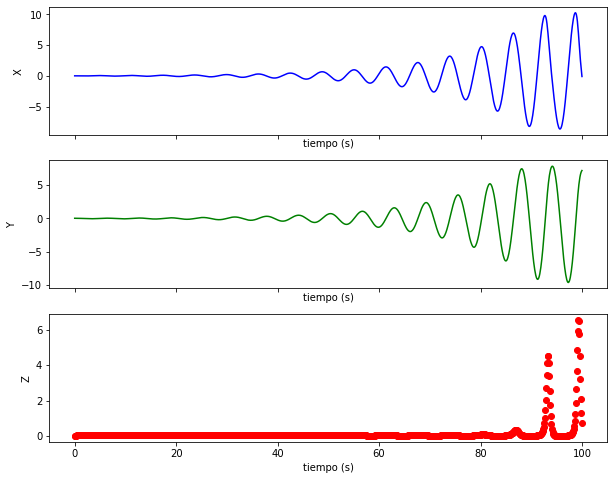

In [113]:
#Graficar normal
atrac.integrate(N, tiempo_inicial, tiempo_final, RK)
atrac.plot()

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

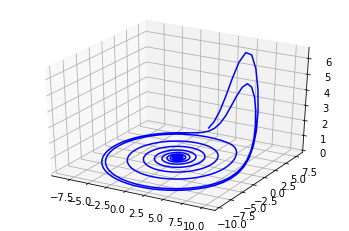

In [115]:
#GRaficar 3d
atrac.integrate(N, tiempo_inicial, tiempo_final, RK)
atrac.plot3()